<a href="https://colab.research.google.com/github/Sharminrahi/Capstone-Project/blob/main/Capstone_Project_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from keras import layers
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
#Mount drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
from pickle import TRUE
file_path = '/content/drive/MyDrive/olympic_athletes.csv'
df = pd.read_csv(file_path)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [6]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [7]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [8]:
#The priority is not missing data, they are all deleted quickly.
df.dropna(inplace=True)
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [9]:
continuous_data = df[['ID', 'Age', 'Height', 'Weight', 'Year']]

In [10]:
continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns
df1 = df[continuous_columns].copy()
df1

,ID,Age,Height,Weight,Year
40,16,28.0,184.0,85.0,2014
41,17,28.0,175.0,64.0,1948
42,17,28.0,175.0,64.0,1948
44,17,28.0,175.0,64.0,1948
48,17,28.0,175.0,64.0,1948
...,...,...,...,...,...
271078,135553,25.0,168.0,80.0,1956
271080,135553,33.0,168.0,80.0,1964
271082,135554,28.0,182.0,82.0,1980
271102,135563,19.0,171.0,64.0,2000


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30181 entries, 40 to 271103
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Age     30181 non-null  float64
 2   Height  30181 non-null  float64
 3   Weight  30181 non-null  float64
 4   Year    30181 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.4 MB


In [12]:
df1.isnull().sum()

ID        0
Age       0
Height    0
Weight    0
Year      0
dtype: int64

In [13]:
# Drop a column from the DataFrame
df2 = df1.drop("ID", axis=1)
df2

,Age,Height,Weight,Year
40,28.0,184.0,85.0,2014
41,28.0,175.0,64.0,1948
42,28.0,175.0,64.0,1948
44,28.0,175.0,64.0,1948
48,28.0,175.0,64.0,1948
...,...,...,...,...
271078,25.0,168.0,80.0,1956
271080,33.0,168.0,80.0,1964
271082,28.0,182.0,82.0,1980
271102,19.0,171.0,64.0,2000


In [14]:
#df.dropna(inplace=True)
df2.isnull().sum()

Age       0
Height    0
Weight    0
Year      0
dtype: int64

In [15]:
df2.describe()

,Age,Height,Weight,Year
count,30181.000000,30181.000000,30181.000000,30181.000000
mean,25.429012,177.642358,73.753554,1988.005964
std,5.049684,10.924188,15.004992,22.718451
min,13.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,63.000000,1976.000000
50%,25.000000,178.000000,73.000000,1992.000000
75%,28.000000,185.000000,83.000000,2006.000000
max,66.000000,223.000000,182.000000,2016.000000


In [16]:
def plotHistogram(veri,variable):
    plt.figure()
    plt.hist(veri[variable], bins = 85 , color = 'orange')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("Data Frequency - {}".format(variable))
    plt.show()

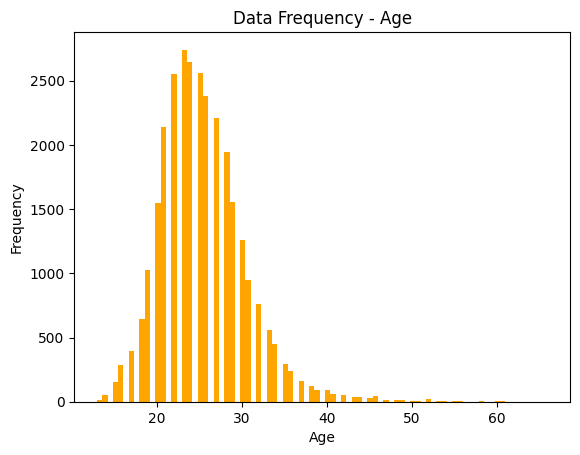

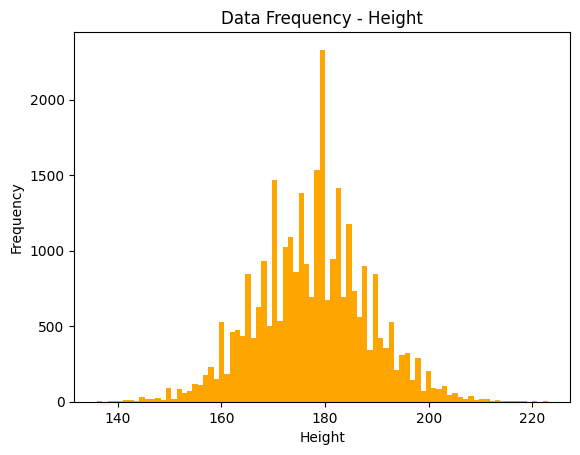

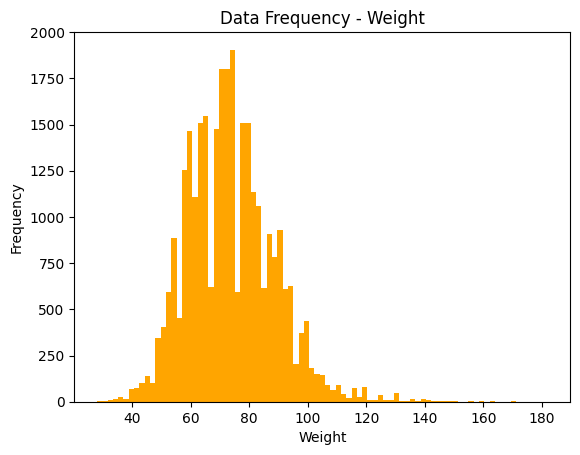

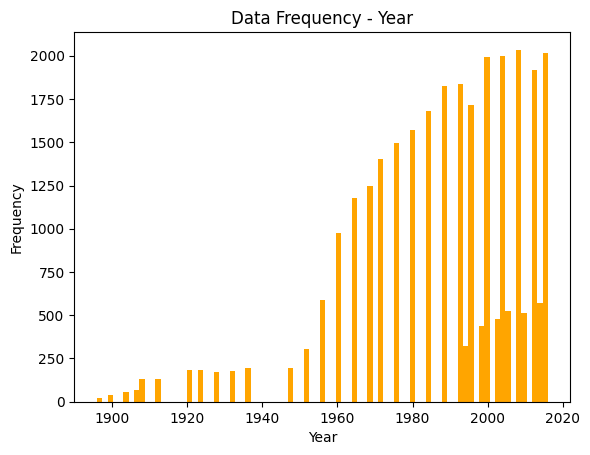

In [17]:
num_var = ["Age","Height","Weight","Year"]
for i in num_var:
    plotHistogram(df2,i)

As expected, there is a distribution close to the normal distribution in the age, weight and height columns.

#Define X

In [18]:
X = df2.to_numpy()
X

array([[  28.,  184.,   85., 2014.],
       [  28.,  175.,   64., 1948.],
       [  28.,  175.,   64., 1948.],
       ...,
       [  28.,  182.,   82., 1980.],
       [  19.,  171.,   64., 2000.],
       [  23.,  171.,   64., 2004.]])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [20]:
print(X_train.shape)

(24144, 4)


In [21]:
# ds_train = tf.data.Dataset.from_tensor_slices(X_train).batch(batch_size, drop_remainder = True)

In [22]:
print(X_test.shape)

(6037, 4)


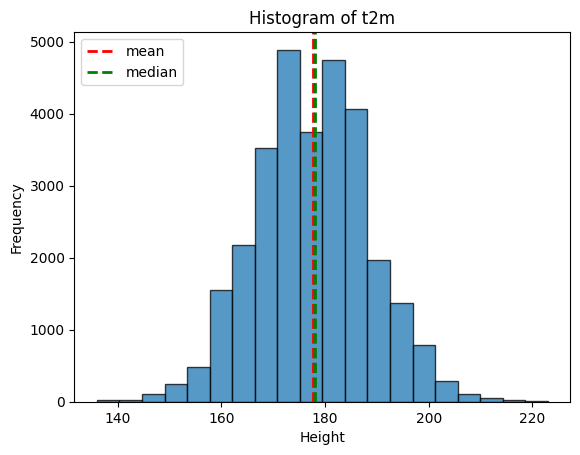

In [23]:
import matplotlib.pyplot as plt

# Get the values of t2m
height_values = df2['Height'].dropna()

# Plot the histogram
n, bins, patches = plt.hist(height_values, bins=20, edgecolor='black', alpha=0.75)

# Calculate the mean and median
mean = height_values.mean()
median = height_values.median()

# Add lines for mean and median
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='mean')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label='median')

# Add legend
plt.legend(loc='upper left')

# Add title and labels
plt.title('Histogram of t2m')
plt.xlabel('Height')
plt.ylabel('Frequency')

# Show plot
plt.show()


<ipython-input-24-5cde1a3de68d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Height'].dropna(), hist=True, kde=True, rug=False)


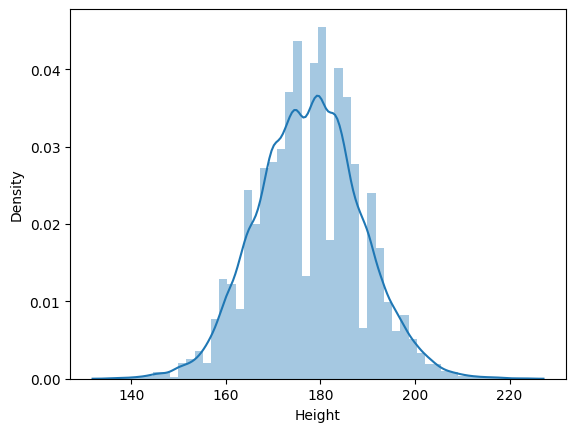

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df2['Height'].dropna(), hist=True, kde=True, rug=False)

plt.show();

# Hyperparameters

In [25]:
# data
dataset_name = "df2"
dataset_repetitions = 5
num_epochs = 5  # train for at least 50 epochs for good results
image_size = 4
# KID = Kernel Inception Distance, see related section
#kid_image_size = 75
#kid_diffusion_steps = 5
plot_diffusion_steps = 20

# sampling
min_signal_rate = 0.02
max_signal_rate = 0.95

# architecture
embedding_dims = 32
embedding_max_frequency = 1000.0
widths = [32, 64, 96, 128]
block_depth = 2

# optimization
batch_size = 32
ema = 0.999
learning_rate = 1e-3
weight_decay = 1e-4

In [26]:
 ds_train = tf.data.Dataset.from_tensor_slices(X_train).batch(batch_size, drop_remainder = True)

#####3#
### Data Pipeline

In [27]:
def sinusoidal_embedding(x):
    embedding_min_frequency = 1.0
    frequencies = tf.exp(
        tf.linspace(
            tf.math.log(embedding_min_frequency),
            tf.math.log(embedding_max_frequency),
            embedding_dims // 2,
        )
    )
    angular_speeds = 2.0 * math.pi * frequencies
    embeddings = tf.concat(
        [tf.sin(angular_speeds * x), tf.cos(angular_speeds * x)], axis=1
        #axis=1
    )
    return embeddings
#Network MLP
def get_mlp(image_size, hidden_units):
    noisy_images = keras.Input(shape=(4,))  # instead of 3 its 4
    noise_variances = keras.Input(shape=(1,))  # shape = 1,

    x = layers.Flatten()(noisy_images)
    x = layers.Concatenate()([x, noise_variances])

    for units in hidden_units:
        x = layers.Dense(units, activation="relu")(x)

    x = layers.Dense(4, activation="linear")(x)
    #x = layers.Reshape((image_size, image_size, 3))(x)

    return keras.Model([noisy_images, noise_variances], x, name="mlp")
# Example usage:
image_size = 4
hidden_units = [256, 128, 64]
mlp_model = get_mlp(image_size, hidden_units)
mlp_model.summary()

Model: "mlp"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 flatten (Flatten)           (None, 4)                    0         ['input_1[0][0]']             
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 5)                    0         ['flatten[0][0]',             
                                                                     'input_2[0][0]']           

#Diffusion Model

In [28]:
class DiffusionModel(keras.Model):
    def __init__(self, image_size, widths, block_depth):
        super().__init__()

        self.normalizer = layers.Normalization()
        self.network = get_mlp(image_size, hidden_units)
        self.ema_network = keras.models.clone_model(self.network)

    def compile(self, **kwargs):
        super().compile(**kwargs)

        self.noise_loss_tracker = keras.metrics.Mean(name="n_loss")
        self.image_loss_tracker = keras.metrics.Mean(name="i_loss")
        #self.kid = KID(name="kid")

    @property
    def metrics(self):
        return [self.noise_loss_tracker, self.image_loss_tracker]

    def denormalize(self, images):
        # convert the pixel values back to 0-1 range
        images = self.normalizer.mean + images * self.normalizer.variance**0.5
        # return tf.clip_by_value(images, 0.0, 1.0)
        return images

    def diffusion_schedule(self, diffusion_times):
        # diffusion times -> angles
        start_angle = tf.acos(max_signal_rate)
        end_angle = tf.acos(min_signal_rate)

        diffusion_angles = start_angle + diffusion_times * (end_angle - start_angle)

        # angles -> signal and noise rates
        signal_rates = tf.cos(diffusion_angles)
        noise_rates = tf.sin(diffusion_angles)
        # note that their squared sum is always: sin^2(x) + cos^2(x) = 1

        return noise_rates, signal_rates

    def denoise(self, noisy_images, noise_rates, signal_rates, training):
        # the exponential moving average weights are used at evaluation
        if training:
            network = self.network
        else:
            network = self.ema_network

        # predict noise component and calculate the image component using it
        pred_noises = network([noisy_images, noise_rates**2], training=training)
        pred_images = (noisy_images - noise_rates * pred_noises) / signal_rates

        return pred_noises, pred_images

    def reverse_diffusion(self, initial_noise, diffusion_steps):
        # reverse diffusion = sampling
        num_images = initial_noise.shape[0]
        step_size = 1.0 / diffusion_steps

        # important line:
        # at the first sampling step, the "noisy image" is pure noise
        # but its signal rate is assumed to be nonzero (min_signal_rate)
        next_noisy_images = initial_noise
        for step in range(diffusion_steps):
            noisy_images = next_noisy_images

            # separate the current noisy image to its components
            diffusion_times = tf.ones((num_images, 1)) - step * step_size
            noise_rates, signal_rates = self.diffusion_schedule(diffusion_times)
            pred_noises, pred_images = self.denoise(
                noisy_images, noise_rates, signal_rates, training = False
            )
            # network used in eval mode

            # remix the predicted components using the next signal and noise rates
            next_diffusion_times = diffusion_times - step_size
            next_noise_rates, next_signal_rates = self.diffusion_schedule(
                next_diffusion_times
            )
            next_noisy_images = (
                next_signal_rates * pred_images + next_noise_rates * pred_noises
            )
            # this new noisy image will be used in the next step

        return pred_images

    def generate(self, num_images, diffusion_steps):
        # noise -> images -> denormalized images
        initial_noise = tf.random.normal(shape=(num_images, 4))
        generated_images = self.reverse_diffusion(initial_noise, diffusion_steps)
        generated_images = self.denormalize(generated_images)
        return generated_images

    def train_step(self, images):
        # normalize images to have standard deviation of 1, like the noises
        images = self.normalizer(images, training = True)
        noises = tf.random.normal(shape = (batch_size, 1))

        # sample uniform random diffusion times
        diffusion_times = tf.random.uniform(
            shape=(batch_size, 1), minval=0.0, maxval=1.0
        )
        noise_rates, signal_rates = self.diffusion_schedule(diffusion_times)
        # mix the images with noises accordingly
        noisy_images = signal_rates * images + noise_rates * noises

        with tf.GradientTape() as tape:
            # train the network to separate noisy images to their components
            pred_noises, pred_images = self.denoise(
                noisy_images, noise_rates, signal_rates, training=True
            )

            noise_loss = self.loss(noises, pred_noises)  # used for training
            image_loss = self.loss(images, pred_images)  # only used as metric

        gradients = tape.gradient(noise_loss, self.network.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.network.trainable_weights))

        self.noise_loss_tracker.update_state(noise_loss)
        self.image_loss_tracker.update_state(image_loss)

        # track the exponential moving averages of weights
        for weight, ema_weight in zip(self.network.weights, self.ema_network.weights):
            ema_weight.assign(ema * ema_weight + (1 - ema) * weight)

        # KID is not measured during the training phase for computational efficiency
        return {m.name: m.result() for m in self.metrics[:-1]}

    def test_step(self, images):
        # normalize images to have standard deviation of 1, like the noises
        images = self.normalizer(images, training = False)
        noises = tf.random.normal(shape =(batch_size, 1))

        # sample uniform random diffusion times
        diffusion_times = tf.random.uniform(
            shape=(batch_size, 1), minval=0.0, maxval=1.0
        )
        noise_rates, signal_rates = self.diffusion_schedule(diffusion_times)
        # mix the images with noises accordingly
        noisy_images = signal_rates * images + noise_rates * noises

        # use the network to separate noisy images to their components
        pred_noises, pred_images = self.denoise(
            noisy_images, noise_rates, signal_rates, training = False
        )

        noise_loss = self.loss(noises, pred_noises)
        image_loss = self.loss(images, pred_images)

        self.image_loss_tracker.update_state(image_loss)
        self.noise_loss_tracker.update_state(noise_loss)

        # measure KID between real and generated images
        # this is computationally demanding, kid_diffusion_steps has to be small
        images = self.denormalize(images)
        generated_images = self.generate(
            num_images = batch_size
        )
        #self.kid.update_state(images, generated_images)

        return {m.name: m.result() for m in self.metrics[:-1]}

    def generate_data(self, epoch=None, logs =None, num_samples=20):
        # plot random generated images for visual evaluation of generation quality
        generated_images = self.generate(
            num_images=num_samples,
            diffusion_steps=plot_diffusion_steps,
        )
        return generated_images

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
 # create and compile the model
model = DiffusionModel(4, widths, block_depth)
# below tensorflow 2.9:
# pip install tensorflow_addons
# import tensorflow_addons as tfa
# optimizer=tfa.optimizers.AdamW
model.compile(
    optimizer = keras.optimizers.experimental.AdamW(
        learning_rate  =learning_rate, weight_decay = weight_decay
    ),
    loss = keras.losses.mean_squared_error,
)
# pixelwise mean absolute error is used as loss

# save the best model based on the validation KID metric
checkpoint_path = "checkpoints/diffusion_model"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path,
    save_weights_only = True,
    #monitor =" val_kid",
    mode = "min",
    save_best_only=True,
)

# calculate mean and variance of training dataset for normalization
model.normalizer.adapt(ds_train)

# run training and plot generated images periodically
hist = model.fit(ds_train,
    epochs=5,
    #callbacks=[
       # keras.callbacks.LambdaCallback(on_epoch_end=model.plot_images),
        #checkpoint_callback
)

Epoch 1/5
754/754 [==============================] - 8s 3ms/step - n_loss: 0.2334
Epoch 2/5
754/754 [==============================] - 3s 4ms/step - n_loss: 0.2145
Epoch 3/5
754/754 [==============================] - 5s 7ms/step - n_loss: 0.2134
Epoch 4/5
754/754 [==============================] - 3s 4ms/step - n_loss: 0.2138
Epoch 5/5
754/754 [==============================] - 3s 3ms/step - n_loss: 0.2143


In [31]:
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
synthetic_data = model.generate_data()
print(synthetic_data)
#model.generate_data()

tf.Tensor(
[[-3.98608856e+02 -5.83827393e+02 -6.91197693e+02  2.67323901e+03]
 [ 4.99924500e+02  8.34016724e+02 -2.96696594e+02  1.23927710e+03]
 [-2.32290588e+02 -6.63186768e+02 -1.39940234e+03  2.87602197e+03]
 [ 1.97030060e+02  1.28635315e+02  5.30979919e+02  9.41320435e+02]
 [-9.56936188e+01  1.13879968e+03 -9.64321045e+02  3.38445850e+03]
 [ 6.54420242e+01  3.00776367e+02  8.81182678e+02  7.86719360e+02]
 [ 5.72834534e+02 -2.56454468e+02  9.53049744e+02  1.86021118e+03]
 [-5.38364143e+01  4.24566437e+02  1.64338043e+02  6.54668091e+02]
 [-1.13824524e+02  1.03442224e+03  6.77944824e+02  2.09411108e+03]
 [ 1.72503555e+02  1.35691803e+02  1.53807266e+02  1.08676953e+03]
 [ 3.55623230e+02  6.70238281e+02 -7.73344177e+02  2.95787939e+03]
 [ 1.26527948e+01  1.44823273e+02  5.78986694e+02  2.19669141e+03]
 [ 4.73987366e+02  3.74907532e+01  3.45798401e+02  8.41564453e+02]
 [ 1.81298828e+02 -5.50981445e+02  1.09733459e+03  2.64440234e+03]
 [ 7.16452332e+01 -4.76681824e+02  2.61847412e+02  

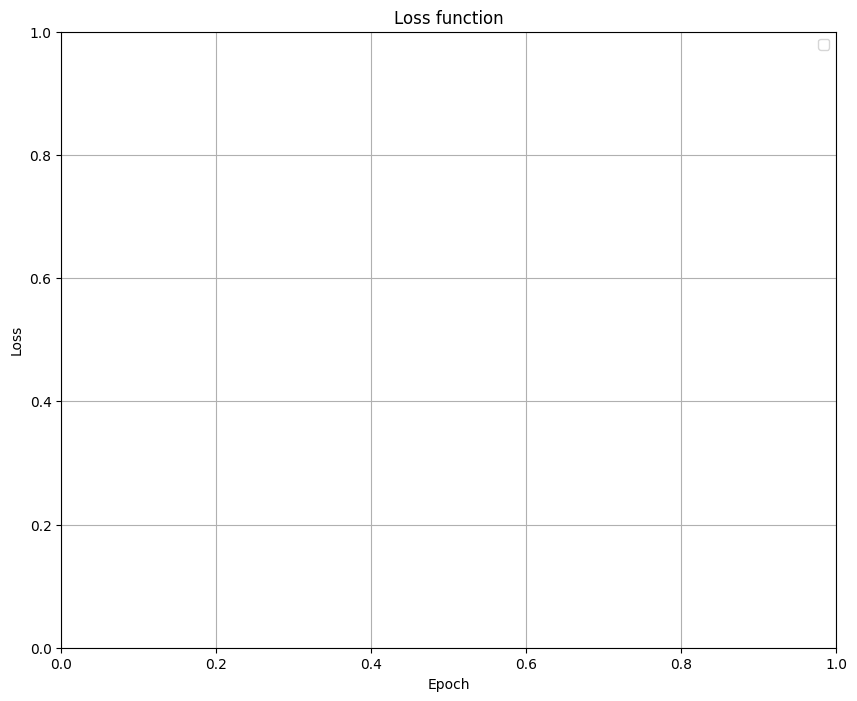

In [33]:
# fig = plt.figure(figsize=(10,8))
# #plt.plot(hist.history['loss'])
# #plt.plot(hist.history['val_loss'])
# plt.title('Loss function')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.grid()
# plt.legend(['Training data', 'Test data'])
# plt.show()
